In [22]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

from scipy import stats

df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [8]:
df.isnull()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,False,False,False,False,False,False,False,False,False,False,False,False,False
295,False,False,False,False,False,False,False,False,False,False,False,False,False
296,False,False,False,False,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False,False,False,False,False


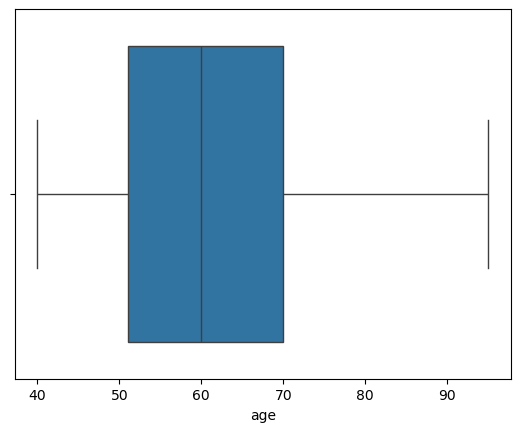

In [15]:
sns.boxplot(x=df["age"])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

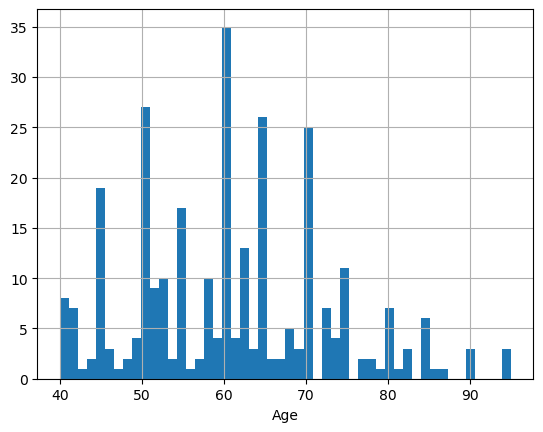

In [16]:
df["age"].hist(bins=50)
plt.xlabel('Age')
plt.show

In [20]:
z_scores = np.abs(stats.zscore(df["age"]))
outliers_z = df[z_scores > 3]
print(outliers_z.shape)

(0, 13)


In [24]:
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = df[(df["age"] < lower_bound) | 
(df["age"] > upper_bound)]
print(outliers_iqr.shape)

(0, 13)


In [25]:
df_removed = df[(df["age"] >= lower_bound) 
& (df["age"] <= upper_bound)]
print(df_removed.shape)


(299, 13)


In [28]:
df.iloc[2,3]

0

In [30]:
df.loc[2,'age']

65.0

In [31]:
df.sort_values("age")

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
269,40.0,0,582,1,35,0,222000.00,1.00,132,1,0,244,0
232,40.0,1,129,0,35,0,255000.00,0.90,137,1,0,209,0
180,40.0,0,478,1,30,0,303000.00,0.90,136,1,0,148,0
242,40.0,0,90,0,35,0,255000.00,1.10,136,1,1,212,0
248,40.0,0,624,0,35,0,301000.00,1.00,142,1,1,214,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,90.0,1,60,1,50,0,226000.00,1.00,134,1,0,30,1
5,90.0,1,47,0,40,1,204000.00,2.10,132,1,1,8,1
30,94.0,0,582,1,38,1,263358.03,1.83,134,1,0,27,1
55,95.0,1,371,0,30,0,461000.00,2.00,132,1,0,50,1


In [35]:
df.sort_values("age",ascending=False)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
26,95.0,1,112,0,40,1,196000.00,1.00,138,0,0,24,1
55,95.0,1,371,0,30,0,461000.00,2.00,132,1,0,50,1
30,94.0,0,582,1,38,1,263358.03,1.83,134,1,0,27,1
36,90.0,1,60,1,50,0,226000.00,1.00,134,1,0,30,1
5,90.0,1,47,0,40,1,204000.00,2.10,132,1,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,40.0,0,244,0,45,1,275000.00,0.90,140,0,0,174,0
248,40.0,0,624,0,35,0,301000.00,1.00,142,1,1,214,0
206,40.0,1,101,0,40,0,226000.00,0.80,141,0,0,187,0
269,40.0,0,582,1,35,0,222000.00,1.00,132,1,0,244,0


In [46]:
df_capped = df.copy()
df_capped["age"] = np.where(df_capped["age"] > upper_bound, upper_bound,
                            np.where(df_capped["age"] < lower_bound, lower_bound, df_capped["age"]))

In [49]:
outliers_iqr2 = df_capped[(df_capped["age"] < lower_bound) | (df_capped["age"] > upper_bound)]
print(outliers_iqr2.shape)

(0, 13)


In [45]:
df_log = df.copy()
df_log["age"] = np.log(df_log["age"] + 1)

In [44]:
df_imp = df.copy()
median_value = df["age"].median()
df_imp.loc[(df_imp["age"] > upper_bound) | 
(df_imp["age"] < lower_bound), 
"age"] = median_value


In [48]:
outliers_iqr3 = df_log[(df_capped["age"] < lower_bound) | (df_log["age"] > upper_bound)]
print(outliers_iqr3.shape)

(0, 13)


In [47]:
outliers_iqr4 = df_imp[(df_capped["age"] < lower_bound) | (df_imp["age"] > upper_bound)]
print(outliers_iqr4.shape)

(0, 13)


In [50]:
df.dropna()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [52]:
df.fillna(2)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [60]:
df1=df.copy()
df1.groupby("age").mean()

,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,,,,,,,,,,,,
40.000,0.285714,321.142857,0.285714,36.428571,0.142857,262428.571429,0.942857,137.714286,0.714286,0.285714,198.285714,0.000000
41.000,0.000000,148.000000,0.000000,40.000000,0.000000,374000.000000,0.800000,140.000000,1.000000,1.000000,68.000000,0.000000
42.000,0.285714,908.142857,0.285714,35.714286,0.000000,244051.147143,1.468571,137.142857,0.714286,0.428571,143.428571,0.142857
43.000,1.000000,358.000000,0.000000,50.000000,0.000000,237000.000000,1.300000,135.000000,0.000000,0.000000,97.000000,0.000000
44.000,0.000000,333.000000,1.000000,35.000000,1.000000,249179.015000,1.150000,134.500000,1.000000,0.500000,161.500000,0.000000
45.000,0.210526,1239.000000,0.578947,39.263158,0.263158,331300.845263,1.024211,137.578947,0.631579,0.157895,156.315789,0.315789
46.000,0.333333,392.666667,0.333333,30.666667,0.666667,294119.343333,1.393333,133.666667,0.000000,0.000000,105.333333,0.333333
47.000,0.000000,582.000000,0.000000,25.000000,0.000000,130000.000000,0.800000,134.000000,1.000000,0.000000,201.000000,0.000000
48.000,1.000000,356.500000,1.000000,42.500000,0.500000,165500.000000,1.750000,125.500000,0.000000,0.000000,104.000000,1.000000


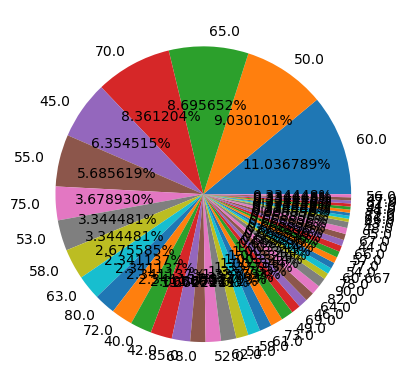

In [62]:
df['age'].value_counts().plot.pie(autopct='%1f%%')
plt.ylabel('')
plt.show()
